# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
#cosine_rv = sts.cosine()
norm_rv = sts.norm()

sample = norm_rv.rvs(100)
sample

array([ 2.90919654,  0.01602679,  1.74099218, -0.50779067,  1.57600418,
       -0.04280384,  1.20848389,  0.99101364,  0.049889  , -0.09664583,
       -1.65634366,  0.16811619,  0.78501214,  0.03085576, -0.15949312,
       -1.6647986 , -1.53216158,  0.73233986, -0.63841608,  0.67478289,
       -0.58570976,  0.76190426,  0.48481543,  3.05137259, -0.37742578,
       -1.34549301, -1.44775445,  1.56916723, -0.35381474, -0.51805307,
       -0.33365206,  0.14789568,  1.88743143,  0.57131767, -0.80678382,
        1.66648156,  0.32839864,  0.16443825,  0.37232132,  0.62208564,
       -0.22524529,  0.57468418,  1.10061179,  0.29362721, -1.02541702,
        0.97026345,  0.32542083, -1.84155874, -0.26337452, -0.16973285,
       -0.298055  , -0.2448258 ,  0.63510546,  2.07191121, -1.0420772 ,
       -0.06006734, -0.36085335, -1.20124222,  0.99789275, -1.26530002,
        2.15620379, -0.36462287, -2.59128482, -0.33461064, -1.30808485,
        2.23103906,  0.22012821, -0.31853278, -0.15540969, -0.24

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = norm_rv.mean() # настоящее среднее случайной величины
real_mean

0.0

In [5]:
real_var = norm_rv.var() # настоящая дисперсия случайной величины
real_var

1.0

### Постройте гистограмму выборки и теоретическую плотность распределения

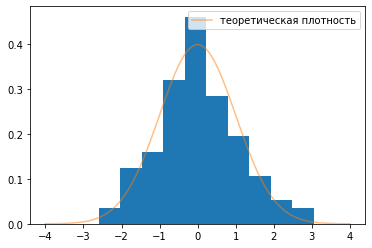

In [6]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.033957071497241344
1.172196503396146


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [8]:
a = 2
b = 5

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([4.64150871, 2.92263164, 2.42355821, 2.1717658 , 3.57687818,
       2.58962124, 3.34064479, 3.10986461, 4.88336254, 3.98067623])

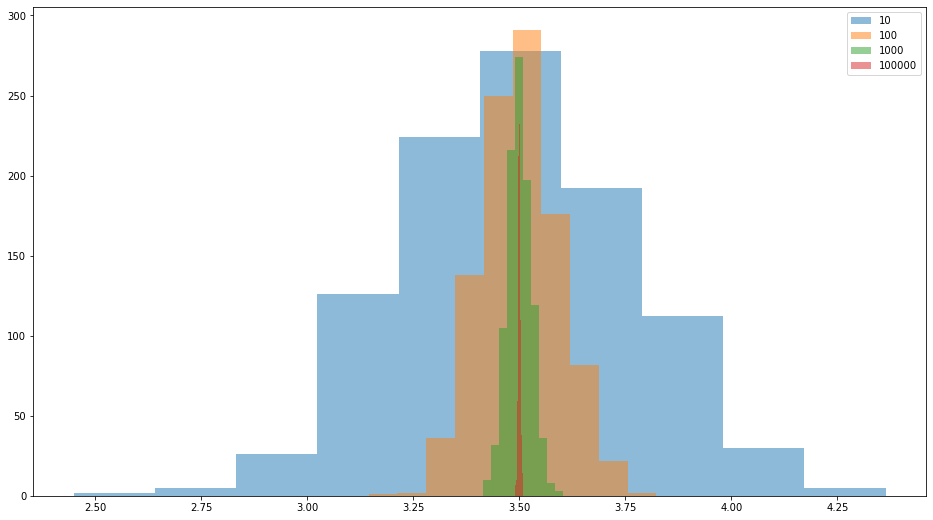

In [9]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 100000]:
    means = []
    for i in range(1000):
         means.append(np.mean(uniform_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '100000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [10]:
#для выбранного распределения апроксимация распределения выборочного среднего работает хорошо.
#С увеличением объема выборки стремится к 3,5

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [11]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [12]:
churn_true = df[df['churn'] == True]
churn_true

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,417-1488,no,no,0,280.0,113,47.60,...,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,330-7137,yes,no,0,186.1,114,31.64,...,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,411-5677,yes,no,0,140.0,101,23.80,...,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [13]:
N = len(df)
N

3333

In [14]:
import statsmodels.stats.weightstats as ssw

In [15]:
data = churn_true['total day calls']
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 2 * churn_true['total day calls'].std() / np.sqrt(N), np.mean(data) + 2 * churn_true['total day calls'].std() / np.sqrt(N) 
))
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [100.58773328949944, 102.08307416391672] 
Доверительный интервал для среднего по цпт интервальная оценка: (100.60270016209095, 102.0681072913252) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


In [22]:
np.mean(data) - (1.96* (churn_true['total day calls'].std()/np.sqrt(len(data))))

99.41062692289533

In [23]:
np.mean(data) + (1.96* (churn_true['total day calls'].std()/np.sqrt(len(data))))

103.26018053052083

In [ ]:
#Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 
# оценка с использованием явной формулы для z интервала: (99.41062692289533, 103.26018053052083)     

#Вывод:
    ДИ можно определить разными способами, методом _zconfint_generic интервал получился более точным.